In [ ]:
Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.
Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [21]:
data = pd.read_csv("uber_data.csv")
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [22]:
data.shape


(200000, 9)

In [23]:
data.isnull().sum()


Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [24]:
# Preprocessing
data.drop(columns='Unnamed: 0', inplace=True)  # Remove unnecessary column
data.dropna(inplace=True)                      # Remove rows with missing values
data.drop_duplicates(inplace=True)             # Remove duplicate rows

In [25]:
data.isnull().sum()


key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [26]:
# Filter for valid fare amounts
data = data[data['fare_amount'] > 0]

In [27]:
print(data.columns)


Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')


In [28]:
# Drop unnecessary columns
data.drop(columns=['key', 'pickup_datetime'], inplace=True)
print(data.columns)

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')


In [29]:
# Prepare the feature matrix X and target vector y
X = data.drop(['fare_amount'], axis=1)
y = data['fare_amount']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Check correlation
print("Correlation Matrix:")
print(data.corr())

Correlation Matrix:
                   fare_amount  pickup_longitude  pickup_latitude  \
fare_amount           1.000000          0.010468        -0.008489   
pickup_longitude      0.010468          1.000000        -0.816434   
pickup_latitude      -0.008489         -0.816434         1.000000   
dropoff_longitude     0.009208          0.833132        -0.774880   
dropoff_latitude     -0.011250         -0.846449         0.702450   
passenger_count       0.010422         -0.000488        -0.001500   

                   dropoff_longitude  dropoff_latitude  passenger_count  
fare_amount                 0.009208         -0.011250         0.010422  
pickup_longitude            0.833132         -0.846449        -0.000488  
pickup_latitude            -0.774880          0.702450        -0.001500  
dropoff_longitude           1.000000         -0.916971        -0.000104  
dropoff_latitude           -0.916971          1.000000        -0.000514  
passenger_count            -0.000104         -0.0005

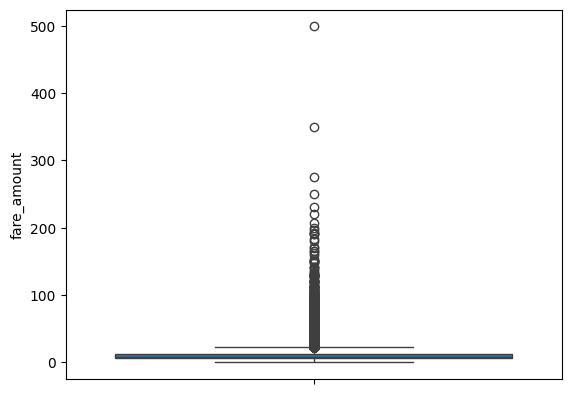

In [30]:
# Identify and remove outliers using a simple threshold method
sns.boxplot(data['fare_amount'])
plt.show()

In [31]:
Q1 = np.percentile(data['fare_amount'], 25, interpolation= 'midpoint')
Q3 = np.percentile(data['fare_amount'], 25, interpolation= 'midpoint')
print(Q1,Q3)

6.0 6.0


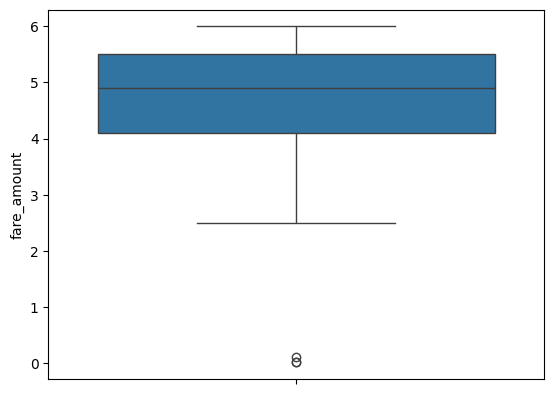

In [32]:
# Define a threshold to remove high fares (considering fares above 6.0 as outliers for simplicity)
data = data[data['fare_amount'] <= 6.0]

# Re-plot to confirm outlier removal
sns.boxplot(data['fare_amount'])
plt.show()
     

In [33]:
def evaluate_model(y_true, y_pred, model_name):
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} RMSE: {rmse:.2f}")
    print(f"{model_name} R-squared (R2): {r2:.2f}")

In [34]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred_linear = linear_model.predict(x_test)
print("\nLinear Regression Model Evaluation:")
evaluate_model(y_test, y_pred_linear, "Linear Regression")


Linear Regression Model Evaluation:
Linear Regression RMSE: 9.82
Linear Regression R-squared (R2): 0.00


In [38]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
print("\nRandom Forest Regression Model Evaluation:")
evaluate_model(y_test, y_pred_rf, "Random Forest Regression")


Random Forest Regression Model Evaluation:
Random Forest Regression RMSE: 4.93
Random Forest Regression R-squared (R2): 0.75


In [ ]:
# Overall Analysis

# The Random Forest Regression model has significantly improved the predictive performance.
# An R-squared (R2) value of approximately 0.701 and a Root Mean Squared Error (RMSE)
# of approximately 5.575 indicate that the Random Forest model is capturing a substantial portion
# of the variance in the target variable and providing more accurate predictions compared to the linear regression model.